# Modelagem de Modelos com Grid Search e Cross Validation

Este notebook tem como objetivo construir, treinar e otimizar diferentes modelos utilizando técnicas avançadas de avaliação e busca de hiperparâmetros. Utilizaremos o **Grid Search** para encontrar a melhor combinação de parâmetros para os nossos modelos e o **Cross Validation** para garantir que os resultados sejam robustos e generalizáveis.

## Objetivos:
- Aplicação de **Grid Search** para otimização de hiperparâmetros dos modelos.
- Uso de **Cross Validation** para avaliação do desempenho do modelo de forma mais precisa e confiável.
- Comparação entre diferentes modelos para identificar a melhor abordagem para o problema.


In [126]:
import pandas as pd

In [127]:
dados = pd.read_csv('data/dados_tratados.csv')
pd.set_option('display.max_columns', None)

In [128]:
y = dados['Winner'].values
X = dados.drop(columns=['Winner']).values

In [129]:
from sklearn.model_selection import GridSearchCV

XGBoost

In [130]:
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [10, 20, 30, 50],
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='mlogloss'),
    param_grid,
    cv=10,
    scoring="accuracy",
    n_jobs=-1,
)

grid_search.fit(X, y)

print(f"Melhor parâmetros: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")


Melhor parâmetros: {'learning_rate': 0.4, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.8}
Melhor Acurácia: 88.22%


Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],  
    'max_depth': [10, 20, 30, 50],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]
}



grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=10,
    scoring="accuracy",
    n_jobs=-1,
)
grid_search.fit(X, y)

print(f"Melhor n_estimators: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")

KeyboardInterrupt: 

SVC

In [ ]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],               
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto', 0.1, 1],   
    'degree': [2, 3, 4],                  
}

grid_search = GridSearchCV(
    SVC(random_state=42, max_iter=100000),                  
    param_grid,                           
    cv=10,                                
    scoring="accuracy",                    
    n_jobs=-1                             
)

grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")

/home/guilherme/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/guilherme/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/guilherme/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/guilherme/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/guilherme/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:305: Co

Melhores parâmetros: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Melhor Acurácia: 61.09%


/home/guilherme/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Regressao Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],       
    'solver': ['liblinear'],      
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42),  
    param_grid,                           
    cv=10,                              
    scoring="accuracy",                  
    n_jobs=-1                             
)

grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")

Melhores parâmetros: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Melhor Acurácia: 97.88%


MLP

In [133]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  
    'activation': ['relu', 'tanh', 'logistic'],  
    'learning_rate_init': [0.001, 0.01, 0.1],         
    'solver': ['adam', 'sgd'],                      
}

grid_search = GridSearchCV(
    MLPClassifier(random_state=42, early_stopping=True),  
    param_grid,                                        
    cv=10,                                              
    scoring="accuracy",                                 
    n_jobs=-1                                           
)

grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")

Melhores parâmetros: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}
Melhor Acurácia: 96.43%


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'p': [1, 2]  
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),  
    param_grid,  
    cv=10,  
    scoring="accuracy",  
    n_jobs=-1  
)

grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")


Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Melhor Acurácia: 54.44%


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  
}

grid_search = GridSearchCV(
    GaussianNB(),  
    param_grid,                                        
    cv=10,                                              
    scoring="accuracy",                                 
    n_jobs=-1                                           
)

grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")


Melhores parâmetros: {'var_smoothing': 1e-08}
Melhor Acurácia: 76.23%


Apos aplicar o GridSearch em todos os modelos, iremos selecionar aqueles com melhor acuracia acima de 80%, afim de selecionar os mais eficazes e aplicar o metodo cross-validation sobre eles, com o objetivo de verificar sua consistencia com diversos dados diferentes

In [135]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

model_XGBoost = XGBClassifier(
    learning_rate=0.2,
    max_depth=10,
    n_estimators=300,
    subsample=0.8,
    eval_metric="logloss"
)

model_randomForest = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42  
)
model_log_reg = LogisticRegression(C=1, max_iter=100000, penalty='l2', solver='liblinear')


model_mlp = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(50,),
    learning_rate_init=0.001,
    max_iter=10000,
    solver='adam'
)



In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

XGBoost

In [147]:
scores = cross_val_score(model_XGBoost, X, y, cv=10, scoring='accuracy')

mean_accuracy = np.mean(scores) * 100
std_dev = np.std(scores) * 100

print(f"Acurácia média: {mean_accuracy:.2f}%")
print(f"Desvio padrão: {std_dev:.2f}%")

Acurácia média: 88.19%
Desvio padrão: 18.95%


Random Forest

In [146]:
scores = cross_val_score(model_randomForest, X, y, cv=10, scoring='accuracy')

mean_accuracy = np.mean(scores) * 100
std_dev = np.std(scores) * 100

print(f"Acurácia média: {mean_accuracy:.2f}%")
print(f"Desvio padrão: {std_dev:.2f}%")

Acurácia média: 88.65%
Desvio padrão: 14.37%


Regressao Logistica

In [138]:
scores = cross_val_score(model_log_reg, X, y, cv=10, scoring='accuracy')

mean_accuracy = np.mean(scores) * 100
std_dev = np.std(scores) * 100

print(f"Acurácia média: {mean_accuracy:.2f}%")
print(f"Desvio padrão: {std_dev:.2f}%")

Acurácia média: 97.88%
Desvio padrão: 4.70%


MLP

In [139]:
scores = cross_val_score(model_mlp, X, y, cv=10, scoring='accuracy')

mean_accuracy = np.mean(scores) * 100
std_dev = np.std(scores) * 100

print(f"Acurácia média: {mean_accuracy:.2f}%")
print(f"Desvio padrão: {std_dev:.2f}%")

Acurácia média: 94.38%
Desvio padrão: 6.65%


Plotagem das curvas

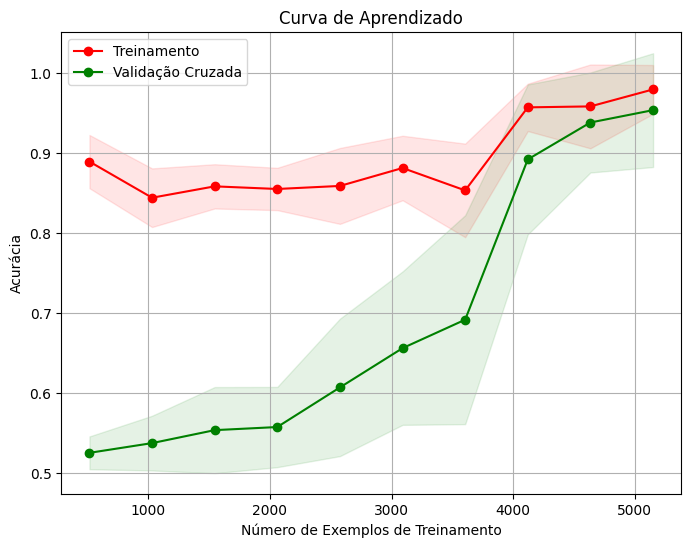

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression


model_log_reg = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(50,),
    learning_rate_init=0.001,
    max_iter=10000,
    solver='adam'
)

train_sizes, train_scores, test_scores = learning_curve(
    model_log_reg, X, y, cv=20, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Curva de Aprendizado")
plt.xlabel("Número de Exemplos de Treinamento")
plt.ylabel("Acurácia")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação Cruzada")

plt.legend(loc="best")
plt.show()


/home/guilherme/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/guilherme/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/guilherme/.local/lib/python3.10/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/guilherme/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercep

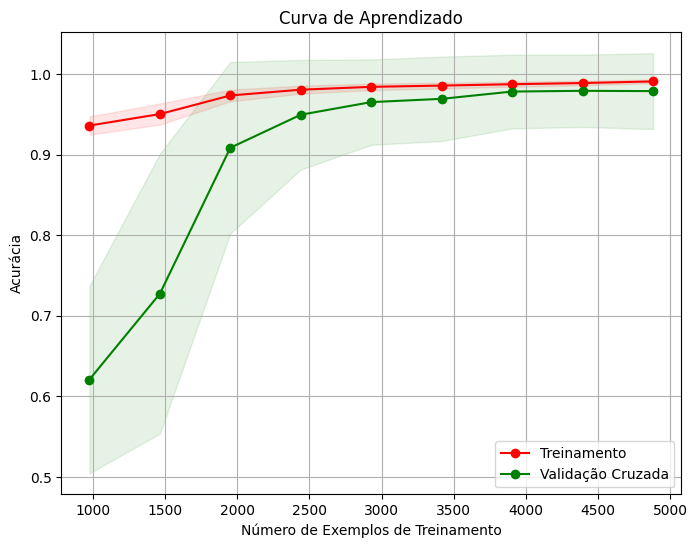

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

model_mlp = LogisticRegression(C=1, max_iter=100000, penalty='l2', solver='liblinear')

train_sizes, train_scores, test_scores = learning_curve(
    model_mlp, X, y, cv=10, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Curva de Aprendizado")
plt.xlabel("Número de Exemplos de Treinamento")
plt.ylabel("Acurácia")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação Cruzada")

plt.legend(loc="best")
plt.show()

In [144]:
model_XGBoost.fit(X,y)
model_randomForest.fit(X,y)
model_log_reg.fit(X,y)
model_mlp.fit(X,y)

LogisticRegression(C=1, max_iter=100000, solver='liblinear')

Salvando os modelos em models

In [145]:
import joblib
import os

models_dir = "models"

models = {
    "xgboost.pkl": model_XGBoost,
    "random_forest.pkl": model_randomForest,
    "logistic_regression.pkl": model_log_reg,
    "mlp.pkl": model_mlp
}

for filename, model in models.items():
    path = os.path.join(models_dir, filename)
    joblib.dump(model, path)
    print(f"Modelo salvo em: {path}")


Modelo salvo em: models/xgboost.pkl
Modelo salvo em: models/random_forest.pkl
Modelo salvo em: models/logistic_regression.pkl
Modelo salvo em: models/mlp.pkl


#### Pudemos observar que todos os modelos mantiveram certa consistencia em relacao ao GridSearch, mas com destaque a Regressao Logistica, que alem de ter uma alta acuracia media, tambem apresentou um baixo desvio padrao, mostrando-se o modelo mais promissor dentre todos desenvolvidos.